<img src="tecno.jpg">


# Analisis de Datos Masivos
## Practica visualización de medidores de Internet


## Nombre del Docente
### Jose Gabriel Rodriguez Rivas

## Nombre del Alumno
### Gerardo Jael Esquivel Martinez


### Parte 1: Limpieza y análisis de datos

Se dice a veces que quienes practican el aprendizaje automático dedican el 80 % de su tiempo a la limpieza de datos. Si bien esta afirmación es probablemente una exageración, es verdad que la limpieza de datos es una tarea fundamental y necesaria para garantizar el éxito de un proyecto de aprendizaje automático. Como en muchas otras líneas de trabajo, se aplica la ley «basura que entra, basura que sale». Simplemente, no es posible realizar un análisis significativo de datos en datos sucios.

**Paso 1: Limpieza de datos**

Cargue los datos del archivo rpi_data_compact.csv. Este archivo contiene las mediciones de la velocidad de Internet adquiridas durante la práctica de laboratorio Internet_Speed_Data_Acquisition. En particular, el enfoque se encuentra en tres cantidades: tiempo de ping (ms), velocidad de descarga (Mbit/s) y velocidad de carga (Mbit/s).

In [1]:
import pandas as pd
import numpy as np

In [2]:
df_compact = pd.read_csv('rpi_data_compact2.csv')
df_compact.head(3)

,Unnamed: 0,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,0,26.992,91.80,14.31,2016-11-24,13:36:25
1,1,24.532,88.19,14.12,2016-11-24,13:36:55
2,2,20.225,59.86,14.11,2016-11-24,13:37:25


In [3]:
df_compact.drop(['Unnamed: 0'], axis=1, inplace = True)
df_compact.head

<bound method NDFrame.head of      Ping (ms)  Download (Mbit/s)  Upload (Mbit/s)        Date      Time
0       26.992              91.80            14.31  2016-11-24  13:36:25
1       24.532              88.19            14.12  2016-11-24  13:36:55
2       20.225              59.86            14.11  2016-11-24  13:37:25
3       19.332              91.81            14.22  2016-11-24  13:37:57
4       22.494              92.05            14.08  2016-11-24  13:38:27
..         ...                ...              ...         ...       ...
675    100.000            2016.00              NaN         NaN       NaN
676    100.000            2016.00              NaN         NaN       NaN
677    100.000            2016.00              NaN         NaN       NaN
678    100.000            2016.00              NaN         NaN       NaN
679     22.175              85.69            14.23        2016       NaN

[680 rows x 5 columns]>

In [4]:
df_compact.head()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
0,26.992,91.80,14.31,2016-11-24,13:36:25
1,24.532,88.19,14.12,2016-11-24,13:36:55
2,20.225,59.86,14.11,2016-11-24,13:37:25
3,19.332,91.81,14.22,2016-11-24,13:37:57
4,22.494,92.05,14.08,2016-11-24,13:38:27


In [5]:
NaNs_in_df = df_compact.isnull()
print(type(NaNs_in_df))
NaNs_in_df.tail()

<class 'pandas.core.frame.DataFrame'>


,Ping (ms),Download (Mbit/s),Upload (Mbit/s),Date,Time
675,False,False,True,True,True
676,False,False,True,True,True
677,False,False,True,True,True
678,False,False,True,True,True
679,False,False,False,False,True


In [6]:
NaNs_per_column = NaNs_in_df.sum()
print(type(NaNs_per_column))
NaNs_per_column.head()

<class 'pandas.core.series.Series'>


Ping (ms)            1
Download (Mbit/s)    1
Upload (Mbit/s)      7
Date                 7
Time                 8
dtype: int64

In [7]:
NaNs_total = NaNs_per_column.sum()
NaNs_total

24

In [8]:
df_compact.isnull().sum().sum()

24

In [9]:
NaNs_pct = np.round(df_compact.isnull().sum().sum()/float(len(df_compact)*len(df_compact.columns))*100, decimals = 4)
print('The DataFrame contains : {} NaNs, equals to {} of the measurements'.format(NaNs_total, NaNs_pct))

The DataFrame contains : 24 NaNs, equals to 0.7059 of the measurements


In [10]:
df_compact_clean = df_compact.dropna()

In [11]:
print(len(df_compact))
print(len(df_compact_clean))

680
672


**Compare la longitud de la Estructura de datos antes y después de utilizar dropna. ¿Observa algún valor impar? ¿Por qué?**

*Por los ultimos datos de la tabla ya que no estaban completos y se eliminaron esos datos, se limpiaron ya que tenian datos nulos.*

In [12]:
df_compact.dtypes

Ping (ms)            float64
Download (Mbit/s)    float64
Upload (Mbit/s)      float64
Date                  object
Time                  object
dtype: object

In [13]:
str_val = '10.56'
float_val = float(str_val)
print(str_val, type(str_val), float_val, type(float_val))    

10.56 <class 'str'> 10.56 <class 'float'>


In [14]:
df_compact_clean['Ping (ms)_float'] = df_compact_clean['Ping (ms)'].apply(lambda val: float(val) )
df_compact_clean['Download (Mbit/s)_float'] = df_compact_clean['Download (Mbit/s)'].apply(lambda val: float(val) )

C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\USUARIO\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
df_compact_clean.dtypes

Ping (ms)                  float64
Download (Mbit/s)          float64
Upload (Mbit/s)            float64
Date                        object
Time                        object
Ping (ms)_float            float64
Download (Mbit/s)_float    float64
dtype: object

In [16]:
df_compact_clean.drop(['Ping (ms)' , 'Download (Mbit/s)'], axis = 1, inplace = True)

C:\Users\USUARIO\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
df_compact_clean.head()

,Upload (Mbit/s),Date,Time,Ping (ms)_float,Download (Mbit/s)_float
0,14.31,2016-11-24,13:36:25,26.992,91.80
1,14.12,2016-11-24,13:36:55,24.532,88.19
2,14.11,2016-11-24,13:37:25,20.225,59.86
3,14.22,2016-11-24,13:37:57,19.332,91.81
4,14.08,2016-11-24,13:38:27,22.494,92.05


In [18]:
columnas = {'Ping (ms)_float': 'Ping (ms)',
           'Download (Mbit/s)_float' : 'Download (Mbit/s)'}
df_compact_clean.rename(columns = columnas, inplace = True)

C:\Users\USUARIO\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [19]:
df_compact_clean.head()

,Upload (Mbit/s),Date,Time,Ping (ms),Download (Mbit/s)
0,14.31,2016-11-24,13:36:25,26.992,91.80
1,14.12,2016-11-24,13:36:55,24.532,88.19
2,14.11,2016-11-24,13:37:25,20.225,59.86
3,14.22,2016-11-24,13:37:57,19.332,91.81
4,14.08,2016-11-24,13:38:27,22.494,92.05


In [20]:
df_compact_clean = df_compact_clean.reindex(columns = ['Date', 'Time', 'Ping (ms)', 'Download (Mbit/s)', 'Upload (Mbit/s)']);

In [21]:
df_compact_clean.head()

,Date,Time,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
0,2016-11-24,13:36:25,26.992,91.80,14.31
1,2016-11-24,13:36:55,24.532,88.19,14.12
2,2016-11-24,13:37:25,20.225,59.86,14.11
3,2016-11-24,13:37:57,19.332,91.81,14.22
4,2016-11-24,13:38:27,22.494,92.05,14.08


In [22]:
df_compact_clean.to_csv('rpi_data_processed.csv', index=False)
df_clean = df_compact_clean

### Paso 2: Estadísticas básicas

Los nuevos datos requieren no solo limpieza, sino también tiempo para familiarizarse con ellos. Cuando inicia un proyecto de análisis de datos, vale la pena invertir en explorar y calcular algunas propiedades estadísticas básicas de los datos. Esto implica calcular promedios, desviaciones estándar y correlaciones.

In [23]:
means = df_clean.mean()
stands = df_clean.std()

#Place mean and std for each column in a tuple
stats_ping = (means['Ping (ms)'], stands['Ping (ms)'])
stats_download = (means['Download (Mbit/s)'], stands['Download (Mbit/s)'])
stats_upload = (means['Upload (Mbit/s)'], stands['Upload (Mbit/s)'])

#Print the mean value ± the standard deviation, including measuring units
print('Average ping time: {} ± {} ms'.format(*stats_ping))
print('Average download speed: {} ± {} Mbit/s'.format(*stats_download))
print('Average upload speed: {} ± {} Mbit/s'.format(*stats_upload))

Average ping time: 21.113875000000007 ± 5.164907779028767 ms
Average download speed: 90.45629464285713 ± 3.4633514246179895 Mbit/s
Average upload speed: 13.69681547619048 ± 1.0810800645602712 Mbit/s


In [24]:
means = df_clean.mean()
print(means)
means['Ping (ms)']

Ping (ms)            21.113875
Download (Mbit/s)    90.456295
Upload (Mbit/s)      13.696815
dtype: float64


21.113875000000007

In [25]:
df_clean['Ping (ms)'].values.sum()/len(df_clean)
print(df_clean['Ping (ms)'].mean())
print(df_clean.mean()['Ping (ms)'])

21.113875000000007
21.113875000000007


In [26]:
df_clean['Date'][0]

'2016-11-24'

In [27]:
#Compute max and min for all the columns of df_compact
mins = df_clean.min()
maxs = df_clean.max()

#Place mean and std for each column in a tuple
mima_ping = (mins['Ping (ms)'], maxs['Ping (ms)'])
mima_download = (mins['Download (Mbit/s)'], maxs['Download (Mbit/s)'])
mima_upload = (mins['Upload (Mbit/s)'], maxs['Upload (Mbit/s)'])

#Print the mean and max values, including measuring units
print('Min ping time: {} ms. Max ping time: {} ms'.format(*mima_ping))
print('Min download speed: {} Mbit/s. Max download speed: {} Mbit/s'.format(*mima_download))
print('Min upload speed: {} Mbit/s. Max upload speed: {} Mbit/s'.format(*mima_upload))

Min ping time: 16.167 ms. Max ping time: 76.528 ms
Min download speed: 58.48 Mbit/s. Max download speed: 92.87 Mbit/s
Min upload speed: 6.21 Mbit/s. Max upload speed: 14.55 Mbit/s


In [29]:
# Code Cell 24
df_clean.describe()

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
count,672.000000,672.000000,672.000000
mean,21.113875,90.456295,13.696815
std,5.164908,3.463351,1.081080
min,16.167000,58.480000,6.210000
25%,19.113500,90.220000,13.640000
50%,20.320000,91.565000,13.980000
75%,21.837750,92.070000,14.180000
max,76.528000,92.870000,14.550000


In [30]:
# Find the min and max ping time
argmin_ping = df_clean['Ping (ms)'].argmin()
argmax_ping = df_clean['Ping (ms)'].argmax()

# Find the min and max download speed
argmin_download = df_clean['Download (Mbit/s)'].argmin()
argmax_download = df_clean['Download (Mbit/s)'].argmax()

# Find the min and max upload speed
argmin_upload = df_clean['Upload (Mbit/s)'].argmin()
argmax_upload = df_clean['Upload (Mbit/s)'].argmax()

In [31]:
# Create a small DataFrame and access its rows using iloc

# A pandas DataFrame can be initialized passing a dict as a parameter to the constructor pd.DataFrame(). 
# The key will represent the column, the values the rows.
df = pd.DataFrame({'field_1': [0,1], 'field_2': [0,2]})
df.head()

,field_1,field_2
0,0,0
1,1,2


In [32]:
df.iloc[1]['field_1']

1

In [33]:
#Print the corresponding Date and Time
print('La velocidad minima de Ping se alcanzo el {} a las {}'.format(df_clean.loc[argmin_ping].Date, 
                                                        df_clean.loc[argmin_ping].Time))
print('La velocidad minima de Descarga se alcanzo el {} a las {}'.format(df_clean.loc[argmin_download].Date, 
                                                        df_clean.loc[argmin_download].Time))

print('La velocidad minima de Carga se alcanzo el {} a las {}'.format(df_clean.loc[argmin_upload].Date, 
                                                        df_clean.loc[argmin_upload].Time))

print('La velocidad maxima de Ping se alcanzo el {} a las {}'.format(df_clean.loc[argmax_ping].Date, 
                                                        df_clean.loc[argmax_ping].Time)) 

print('La velocidad maxima de Descarga se alcanzo el {} a las {}'.format(df_clean.loc[argmax_download].Date, 
                                                        df_clean.loc[argmax_download].Time))

print('La velocidad maxima de Carga se alcanzo el {} a las {}'.format(df_clean.loc[argmax_upload].Date, 
                                                        df_clean.loc[argmax_upload].Time))

La velocidad minima de Ping se alcanzo el 2016-11-24 a las 15:26:20
La velocidad minima de Descarga se alcanzo el 2016-11-24 a las 14:57:55
La velocidad minima de Carga se alcanzo el 2016-11-24 a las 17:31:47
La velocidad maxima de Ping se alcanzo el 2016-11-24 a las 17:30:06
La velocidad maxima de Descarga se alcanzo el 2016-11-24 a las 17:02:49
La velocidad maxima de Carga se alcanzo el 2016-11-24 a las 18:02:15


In [34]:
df_corr = df_clean.corr()
df_corr

,Ping (ms),Download (Mbit/s),Upload (Mbit/s)
Ping (ms),1.000000,-0.045271,-0.463348
Download (Mbit/s),-0.045271,1.000000,0.084833
Upload (Mbit/s),-0.463348,0.084833,1.000000


In [35]:
corr = df_corr.values
print('Correlation coefficient between ping and download: {}'.format(corr[0, 1]))
print('Correlation coefficient between ping and upload: {}'.format(corr[0, 2]))
print('Correlation coefficient between upload and download: {}'.format(corr[2, 1]))

Correlation coefficient between ping and download: -0.04527104992092839
Correlation coefficient between ping and upload: -0.46334785028069125
Correlation coefficient between upload and download: 0.08483302146561673


### Parte 2: Visualización de datos

Como dice el proverbio: «una imagen vale más que mil palabras». Los gráficos informativos, significativos e intuitivos cumplen un rol fundamental en la exploración de datos. Los gráficos son útiles en las etapas iniciales de un proyecto y mucho más allá de ellas también. Los gráficos son una excelente manera de presentar los resultados y las conclusiones de su trabajo frente a una audiencia.

Python tiene una biblioteca integral para crear gráficos llamados Matplotlib. Como recursos adicionales de aprendizaje, vale la pena echar un vistazo a la documentación de Matplotlib y, en particular, a los numerosos ejemplos.

In [36]:
# Code Cell 31
import matplotlib.pyplot as plt

# The following allows your Jupyter notebook to create plots inside a cell
%matplotlib inline 

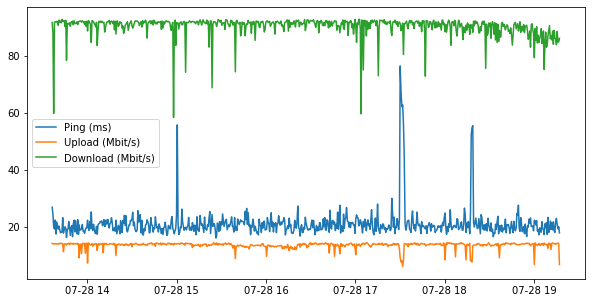

In [40]:
fig, ax = plt.subplots(figsize=(10, 5))

# Create x-axis
t = pd.to_datetime(df_clean['Time'])

# Plot three curves of different colors
ax.plot(t, df_clean['Ping (ms)'], label='Ping (ms)')
ax.plot(t, df_clean['Upload (Mbit/s)'], label='Upload (Mbit/s)')
ax.plot(t, df_clean['Download (Mbit/s)'],label='Download (Mbit/s)')

# Insert legend
ax.legend()
plt.show()

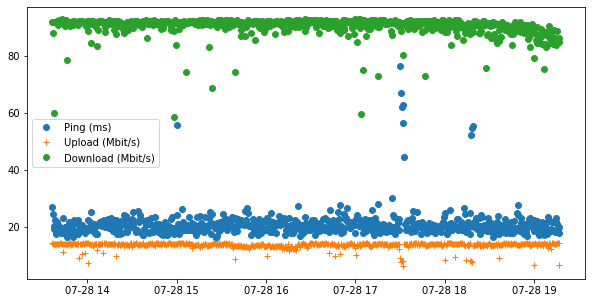

In [41]:
fig, ax = plt.subplots(figsize=(10, 5))

# Create x-axis
t = pd.to_datetime(df_clean['Time'])

# Plot three curves of different colors
ax.plot(t, df_clean['Ping (ms)'],'o', label='Ping (ms)')
ax.plot(t, df_clean['Upload (Mbit/s)'],'+', label='Upload (Mbit/s)')
ax.plot(t, df_clean['Download (Mbit/s)'],'o',label='Download (Mbit/s)')

# Insert legend
ax.legend()
plt.show()

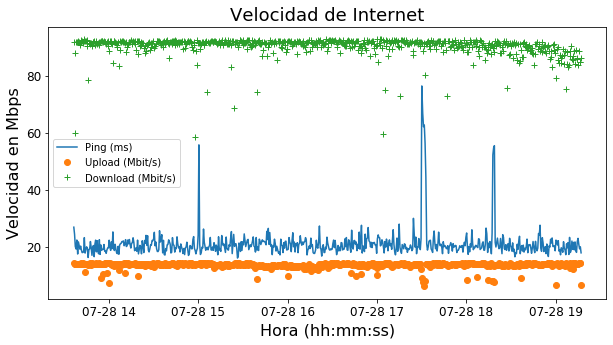

In [44]:
fig, ax = plt.subplots(figsize=(10, 5))

# Create x-axis
t = pd.to_datetime(df_clean['Time'])

# Plot three curves of different colors
ax.plot(t, df_clean['Ping (ms)'], label='Ping (ms)')
ax.plot(t, df_clean['Upload (Mbit/s)'],'o', label='Upload (Mbit/s)')
ax.plot(t, df_clean['Download (Mbit/s)'],'+',label='Download (Mbit/s)')

# Insert legend
ax.legend()
ax.set_xlabel('Hora (hh:mm:ss)', size = 16)
ax.set_ylabel('Velocidad en Mbps', size = 16)
ax.set_title('Velocidad de Internet', size = 18)
ax.tick_params(labelsize=12)
plt.show()

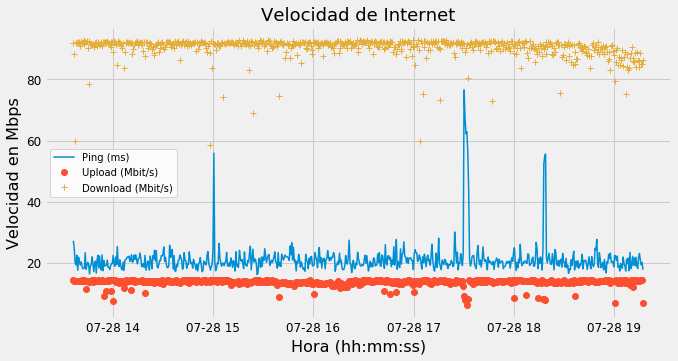

In [45]:
with plt.style.context('fivethirtyeight'):
    fig, ax = plt.subplots(figsize=(10, 5))

# Create x-axis
t = pd.to_datetime(df_clean['Time'])

# Plot three curves of different colors
ax.plot(t, df_clean['Ping (ms)'], label='Ping (ms)')
ax.plot(t, df_clean['Upload (Mbit/s)'],'o', label='Upload (Mbit/s)')
ax.plot(t, df_clean['Download (Mbit/s)'],'+',label='Download (Mbit/s)')

# Insert legend
ax.legend()
ax.set_xlabel('Hora (hh:mm:ss)', size = 16)
ax.set_ylabel('Velocidad en Mbps', size = 16)
ax.set_title('Velocidad de Internet', size = 18)
ax.tick_params(labelsize=12)
plt.show()

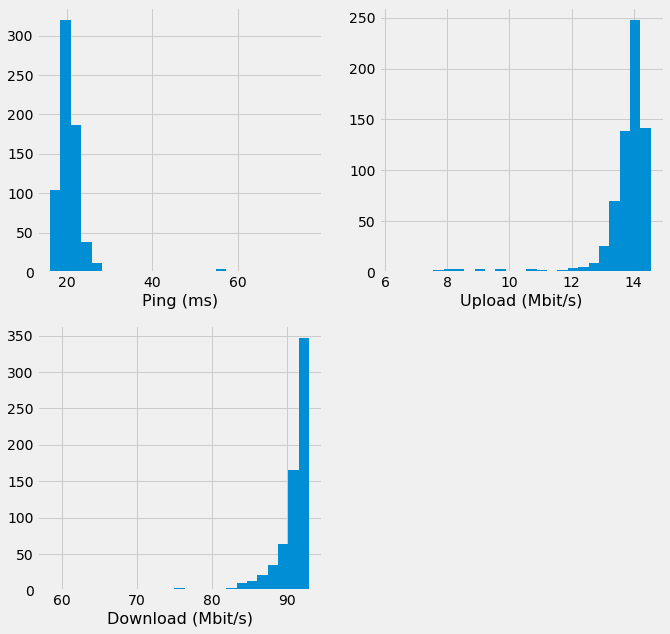

In [46]:
with plt.style.context('fivethirtyeight'):
    
    # Initialize figure
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    ax[0][0].hist(df_clean['Ping (ms)'], 25)
    ax[0][0].set_xlabel('Ping (ms)', fontsize=16)
    ax[0][0].tick_params(labelsize=14)
    ax[0][1].hist(df_clean['Upload (Mbit/s)'], 25)
    ax[0][1].set_xlabel('Upload (Mbit/s)', fontsize=16)
    ax[0][1].tick_params(labelsize=14)
    ax[1][0].hist(df_clean['Download (Mbit/s)'], 25)
    ax[1][0].set_xlabel('Download (Mbit/s)', fontsize=16)
    ax[1][0].tick_params(labelsize=14)
    ax[1][1].set_visible(False)